<a href="https://colab.research.google.com/github/csr911/Ensemble-Learners/blob/main/Ensemble_Learners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement Multi-class Classification problems using Ensemble Learners

In [ ]:
from sklearn.datasets import load_wine
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
wine = load_wine()

In [ ]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

In [ ]:
df = sklearn_to_df(datasets.load_wine())

In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
wine.target[[10, 80, 140]]
list(wine.target_names)

['class_0', 'class_1', 'class_2']

In [ ]:
X, y = wine.data[:, 11:13], wine.target

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

In [ ]:
clf.score(X,y)

1.0

In [ ]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(base_estimator = clf , max_samples=0.1 , max_features = 0.1, n_estimators= 10)
bg.fit(X,y)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.1,
                  max_samples=0.1)

In [ ]:
bg.score(X,y)

0.8595505617977528

In [ ]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


<Axes: >

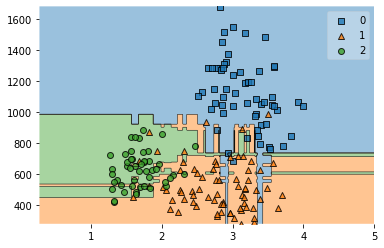

In [ ]:
from mlxtend.plotting import  plot_decision_regions
plot_decision_regions(X,y,bg)

In [ ]:
from sklearn.ensemble import  RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X,y)

RandomForestClassifier(n_estimators=10)

In [ ]:
rf.score(X,y)

0.9831460674157303

<Axes: >

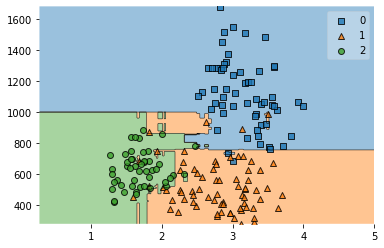

In [ ]:
from mlxtend.plotting import  plot_decision_regions
plot_decision_regions(X,y,rf)

<Axes: >

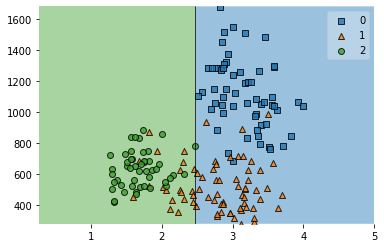

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth= 1)
clf_boost = AdaBoostClassifier(clf, n_estimators = 1)
clf_boost.fit(X,y)
plot_decision_regions(X,y,clf_boost)

0.601123595505618


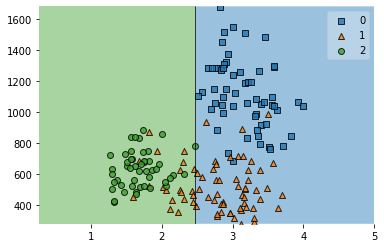

0.7303370786516854


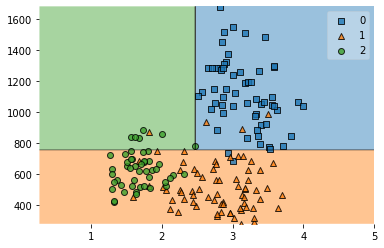

0.8595505617977528


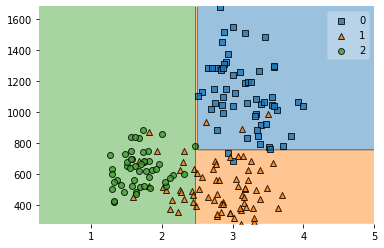

0.8595505617977528


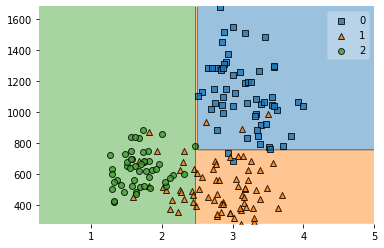

In [ ]:
import matplotlib.pyplot as plt

n_est=[1,2,5,10]

for num_est in n_est:

    clf_boost = AdaBoostClassifier(clf, n_estimators = num_est)
    clf_boost.fit(X,y)
    plot_decision_regions(X,y,clf_boost)
    print(clf_boost.score(X,y))
    plt.show()
